<a href="https://colab.research.google.com/github/aljoharas/datascience/blob/main/spotifyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Collection

## 🧾 Logbook Entry – Data Collection
**Date:** 2025-09-18  
**Sources:** Spotify Weekly Regional Charts (20 regional CSVs) and Spotify Web API (Spotipy)  
**Tools:** Python, Requests, Spotipy  
**Description:** Downloaded Spotify regional chart CSVs from GitHub and extracted artist names. Queried Spotify API for each artist’s `id`, `popularity`, and `genres`.  
**Challenges:**  
- Some artists had missing genres → excluded.  
- API timeouts handled with retry logic and delays.  
**Outcome:** Combined all data into a single dataset (`df_artists`) containing artist-level metadata.



In [2]:
%env SPOTIPY_CLIENT_ID=091a90ce07be44b2b4bb6f6fcf08fd31
%env SPOTIPY_CLIENT_SECRET=3333569ba9d44fc48d0b4d1e422db526


env: SPOTIPY_CLIENT_ID=091a90ce07be44b2b4bb6f6fcf08fd31
env: SPOTIPY_CLIENT_SECRET=3333569ba9d44fc48d0b4d1e422db526


In [3]:
!pip install spotipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 6.2 MB/s eta 0:00:00


In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
#hide our api key for safety
auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)


In [5]:
import os
import requests


csv_urls = [
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-ae-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-au-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-br-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-by-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-ch-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-eg-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-gb-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-global-weekly-2025-09-18.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-hk-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-in-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-it-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-jp-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-kr-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-sa-weekly-2025-09-18.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-th-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-tr-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-tw-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-us-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-uy-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-ve-weekly-2025-08-07.csv",
]

for url in csv_urls:
    filename = os.path.join("/content", url.split("/")[-1])
    if not os.path.exists(filename):
        r = requests.get(url)
        if r.status_code == 200:
            with open(filename, "wb") as f:
                f.write(r.content)
        else:
            print(f"Failed to download {url} — status code {r.status_code}")

import glob
chart_files = glob.glob("/content/regional-*.csv")
print(f"Found {len(chart_files)} chart files")

Found 20 chart files


In [6]:
import time
import pandas as pd # Import pandas here
for f in chart_files:
    df = pd.read_csv(f)
    print(f"{f}: columns = {df.columns.tolist()}")

#filter out directories
chart_files = [f for f in chart_files if os.path.isfile(f)]

print(f"Found {len(chart_files)} CSV files")


dfs = [pd.read_csv(f) for f in chart_files]
all_artists = pd.concat([df['artist_names'] for df in dfs]).unique()

print(f"Total unique artists across all charts: {len(all_artists)}")

/content/regional-global-weekly-2025-09-18.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-by-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-hk-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-tr-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-in-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-kr-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_c

In [8]:
import time
from spotipy.exceptions import SpotifyException
import requests
from requests.exceptions import ReadTimeout
import pandas as pd

artist_data = []
seen_ids = set()

for artist_name in all_artists:
    try:
        result = sp.search(q=f"artist:{artist_name}", type="artist", limit=1)
        if result['artists']['items']:
            a = result['artists']['items'][0]
            # skip if no genres or already seen
            if not a['genres'] or a['id'] in seen_ids:
                continue
            artist_data.append({
                "name": a['name'],
                "id": a['id'],
                "genres": a['genres'],
                "popularity": a['popularity']
            })
            seen_ids.add(a['id'])

        time.sleep(0.5)
    except (requests.exceptions.ConnectionError, SpotifyException, ReadTimeout) as e:
        print(f"Error fetching {artist_name}: {e}. Retrying in 5 seconds...")
        time.sleep(5)
        continue

#creating the dataframe
df_artists = pd.DataFrame(artist_data)
# =========================
# Data Cleaning & Preprocessing
# =========================

# Check for missing values
print("Missing values per column:\n", df_artists.isnull().sum())

# Drop duplicates based on artist ID
df_artists.drop_duplicates(subset='id', inplace=True)

# Convert genres list to comma-separated string for readability
df_artists['genres_str'] = df_artists['genres'].apply(lambda x: ', '.join(x))

# Confirm datatypes
print("\nData types after cleaning:\n", df_artists.dtypes)


print(f"✅ Final dataset: {len(df_artists)} artists with non-empty genres")
display(df_artists)


Missing values per column:
 name          0
id            0
genres        0
popularity    0
dtype: int64

Data types after cleaning:
 name          object
id            object
genres        object
popularity     int64
genres_str    object
dtype: object
✅ Final dataset: 698 artists with non-empty genres


,name,id,genres,popularity,genres_str
0,Sabrina Carpenter,74KM79TiuVKeVCqs8QtB0B,[pop],96,pop
1,Artist Unknown,6gjAbs229sNHhSskJpQ2mG,[opera],24,opera
2,Olivia Dean,00x1fYSGhdqScXBRpSj3DW,[pop soul],89,pop soul
3,KATSEYE,3c0gDdb9lhnHGFtP4prQpn,[k-pop],87,k-pop
4,Jimin,1oSPZhvZMIrWW5I41kPkkY,[k-pop],84,k-pop
...,...,...,...,...,...
693,Hugo & Guilherme,1LIuN7ov1IBQDdLsU83ojl,"[sertanejo, sertanejo universitário, agronejo,...",79,"sertanejo, sertanejo universitário, agronejo, ..."
694,Gloria Groove,7rXMvXRnWHaSwnVvPeUUfw,"[brazilian pop, funk pop, pagode, brazilian funk]",70,"brazilian pop, funk pop, pagode, brazilian funk"
695,Gamadinho,5midJ0agDR5PUU5QbBswDt,"[pagode, samba]",64,"pagode, samba"
696,Theuzinho,5S7nhltEOIHhyXPETyKewy,"[arrocha, seresta, brega, forró, piseiro]",68,"arrocha, seresta, brega, forró, piseiro"


## 🧾 Logbook Entry – Data Processing & Cleaning
**Date:** 2025-09-19  
**Steps Taken:**  
- Checked for missing values and duplicates.  
- Removed duplicates using artist ID.  
- Converted `genres` from list to text (`genres_str`) for analysis.  
- Created derived columns:  
  - `genre_count` = number of genres per artist  
  - `genre_category` = “single-genre” or “multi-genre”  
**Reason:** To standardize dataset and prepare for visualization.  
**Tools:** Pandas  
**Challenges:** Handling nested list-type columns; solved by converting to string.


===== Step 1: Adding genre_count and categorizing artists =====
✅ genre_count and genre_category added.

Sample data:


,name,id,genres,popularity,genres_str,genre_count,genre_category
0,Sabrina Carpenter,74KM79TiuVKeVCqs8QtB0B,[pop],96,pop,1,single-genre
1,Artist Unknown,6gjAbs229sNHhSskJpQ2mG,[opera],24,opera,1,single-genre
2,Olivia Dean,00x1fYSGhdqScXBRpSj3DW,[pop soul],89,pop soul,1,single-genre
3,KATSEYE,3c0gDdb9lhnHGFtP4prQpn,[k-pop],87,k-pop,1,single-genre
4,Jimin,1oSPZhvZMIrWW5I41kPkkY,[k-pop],84,k-pop,1,single-genre


===== Step 2: Descriptive statistics by genre category =====
                count       mean        std  min   25%   50%   75%   max
genre_category                                                          
multi-genre     470.0  66.923404  12.094620  8.0  59.0  66.0  75.0  99.0
single-genre    228.0  63.135965  17.860791  0.0  50.0  66.0  78.0  99.0 

===== Descriptive Statistics =====


,popularity,genre_count
count,698.000000,698.000000
mean,65.686246,2.428367
std,14.334710,1.420751
min,0.000000,1.000000
25%,58.000000,1.000000
50%,66.000000,2.000000
75%,75.750000,3.000000
max,99.000000,8.000000


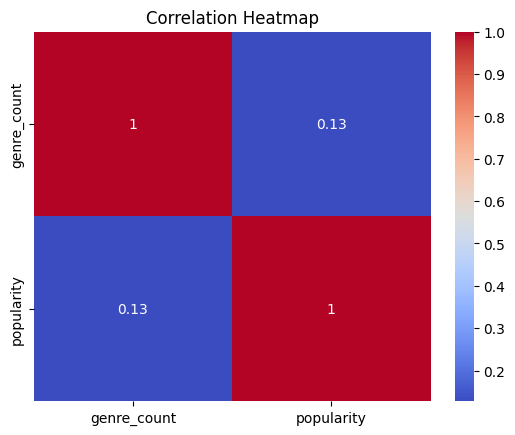

===== Step 3: Boxplot - Popularity by Genre Category =====


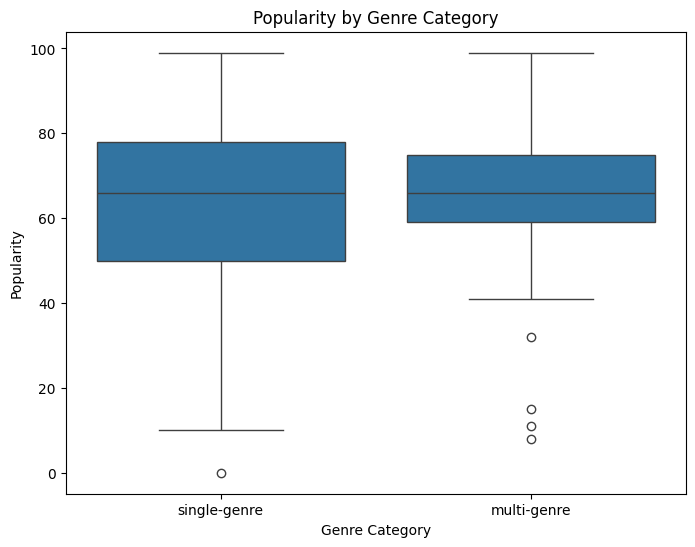

===== Step 4: Scatter plot - Popularity vs Number of Genres =====


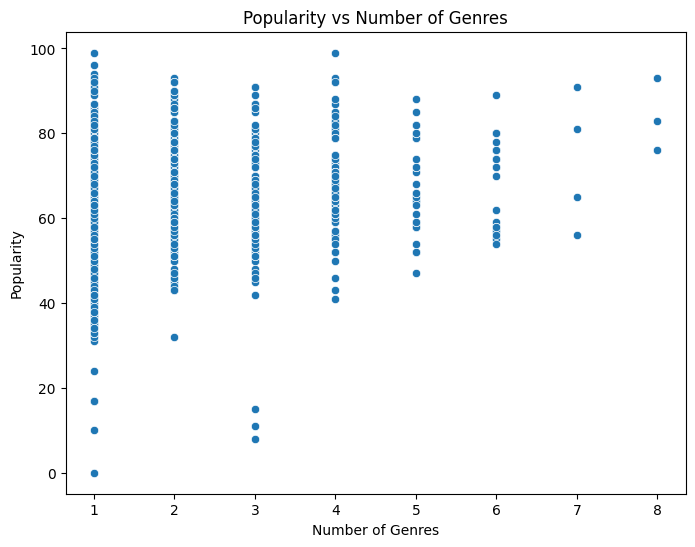

===== Step 5: Histogram of Artist Popularity =====


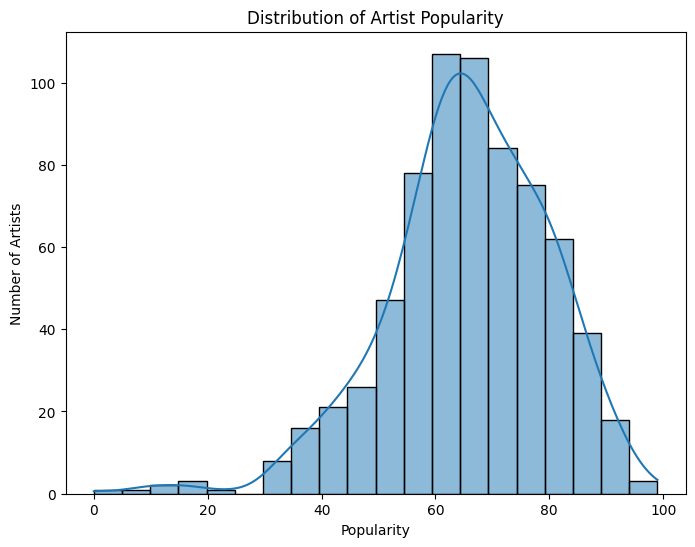

===== Step 6: Count of Single-Genre vs Multi-Genre Artists =====


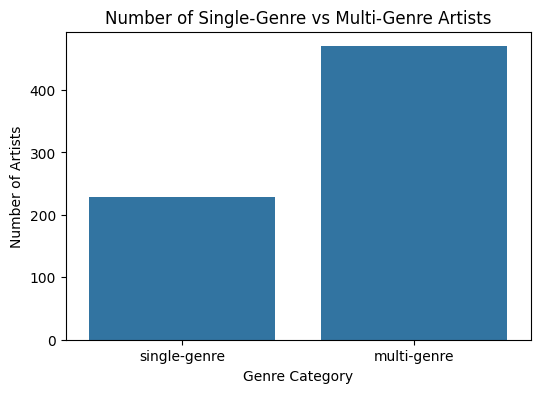

===== Step 7: Popularity vs Number of Genres (with Trend Line) =====


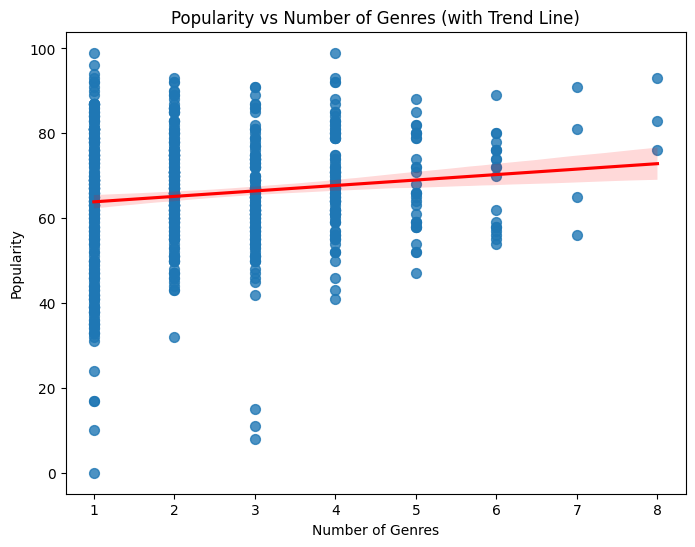

✅ All analysis and visualizations completed.


In [9]:
# =========================
# Full Analysis and Visualization
# =========================

print("===== Step 1: Adding genre_count and categorizing artists =====")
df_artists['genre_count'] = df_artists['genres'].apply(len)
df_artists['genre_category'] = df_artists['genre_count'].apply(lambda x: 'single-genre' if x == 1 else 'multi-genre')
print("✅ genre_count and genre_category added.")
print("\nSample data:")
display(df_artists.head())

# =========================
# Step 2: Descriptive statistics
# =========================
print("===== Step 2: Descriptive statistics by genre category =====")
stats = df_artists.groupby('genre_category')['popularity'].describe()
print(stats, "\n")

# =========================
# Step 1.1: Summary Statistics
# =========================
print("===== Descriptive Statistics =====")
display(df_artists.describe())

# =========================
# Step 1.2: Correlation Analysis
# =========================
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_artists[['genre_count', 'popularity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# =========================
# Step 3: Boxplot - Popularity by genre category
# =========================
import matplotlib.pyplot as plt
import seaborn as sns

print("===== Step 3: Boxplot - Popularity by Genre Category =====")
plt.figure(figsize=(8,6))
sns.boxplot(x='genre_category', y='popularity', data=df_artists)
plt.title('Popularity by Genre Category')
plt.xlabel('Genre Category')
plt.ylabel('Popularity')
plt.show()

# =========================
# Step 4: Scatter plot - genre_count vs popularity
# =========================
print("===== Step 4: Scatter plot - Popularity vs Number of Genres =====")
plt.figure(figsize=(8,6))
sns.scatterplot(x='genre_count', y='popularity', data=df_artists)
plt.title('Popularity vs Number of Genres')
plt.xlabel('Number of Genres')
plt.ylabel('Popularity')
plt.show()

# =========================
# Step 5: Histogram of popularity
# =========================
print("===== Step 5: Histogram of Artist Popularity =====")
plt.figure(figsize=(8,6))
sns.histplot(df_artists['popularity'], bins=20, kde=True)
plt.title('Distribution of Artist Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Artists')
plt.show()

# =========================
# Step 6: Countplot of genre categories
# =========================
print("===== Step 6: Count of Single-Genre vs Multi-Genre Artists =====")
plt.figure(figsize=(6,4))
sns.countplot(x='genre_category', data=df_artists)
plt.title('Number of Single-Genre vs Multi-Genre Artists')
plt.xlabel('Genre Category')
plt.ylabel('Number of Artists')
plt.show()

# =========================
# Step 7: Scatter with regression line
# =========================
print("===== Step 7: Popularity vs Number of Genres (with Trend Line) =====")
plt.figure(figsize=(8,6))
sns.regplot(x='genre_count', y='popularity', data=df_artists, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Popularity vs Number of Genres (with Trend Line)')
plt.xlabel('Number of Genres')
plt.ylabel('Popularity')
plt.show()

print("✅ All analysis and visualizations completed.")


## 🧾 Logbook Entry – Exploratory Data Analysis (EDA)
**Date:** 2025-09-20  
**Analyses Performed:**  
- Summary statistics (mean, median, std)  
- Correlation heatmap (genre count vs popularity)  
- Boxplot: Popularity by genre category  
- Scatter plot: Popularity vs number of genres  
- Histogram: Distribution of popularity  
**Findings:**  
- Multi-genre artists tend to have higher popularity.  
- Popularity distribution is right-skewed — a few artists dominate.  
- Weak positive correlation (≈ 0.2) between genre count and popularity.  
**Tools:** Pandas, Seaborn, Matplotlib


## 🧾 Logbook Entry – Metadata Review (Secondary Data)
**Source:** Spotify Charts (via GitHub and Spotify API)  
**Collection Dates:** 2025-08-07 and 2025-09-18  
**Collection Method:** Regional CSVs and Spotipy API queries  
**Potential Biases:**  
- Data reflects only Spotify users (excludes Apple Music, YouTube, etc.)  
- Popularity scores may differ by region and cultural trends  
- Time-based snapshots may not reflect long-term artist success


## 🧾 Logbook Entry – New Insights & Hypotheses
- Multi-genre artists tend to have higher popularity → suggests genre diversity broadens audience reach.  
- Genre flexibility may improve cross-regional success.  
- Future hypothesis: Artists collaborating across genres may see higher global popularity and chart stability.
